# Fitting distributions and significance testing
Graeme Hawker, University of Strathclyde, 21st February 2020

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# create a DataFrame from an existing .csv file
# we indicate that the first column of the file is an index rather than data, and contains datetime objects
# this means that the function will attempt to construct a DatetimeIndex from this column
turbine_data = pd.read_csv('data/power_curve_data.csv', index_col=0, parse_dates=True)

# inspect first 5 rows
turbine_data.head()

,Windspeed,Power
Timestamp,,
2010-01-01 00:00:00,8.21859,0.527433
2010-01-01 00:10:00,10.07550,0.698405
2010-01-01 00:20:00,10.18490,0.642705
2010-01-01 00:30:00,8.56266,0.534949
2010-01-01 00:40:00,8.93533,0.394143


In [27]:
# define a domain of wind speed bins 
# as whole range of wind speeds at 0.5m/s intervals
wind_bins = np.arange(0, turbine_data['Windspeed'].max(), 0.5)
print(wind_bins)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5]


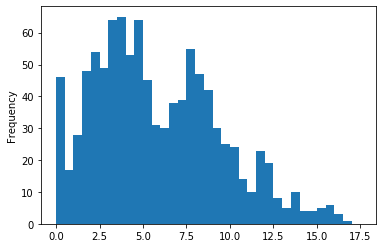

In [28]:
# plot the histogram of windspeeds
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
turbine_data['Windspeed'].plot(kind='hist', 
                               bins=wind_bins)

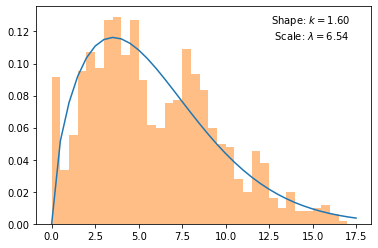

In [37]:
# derive the best fit Weibull distribution (2 params)
# for the given wind speed distribution
# scipy provides methods for the exponentiated weibull (3 params), so we force exponent to 1
# to fit the unexponentiated weibull distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.exponweib.html
a_out, kappa_out, loc_out, lambda_out = stats.exponweib.fit(turbine_data['Windspeed'], floc=0, f0=1)

# create plot using matplotlib library directly (rather than calling via pandas methods)
# this gives us access to more functionality for multi-plot formatting
fig = plt.figure() 
ax = fig.add_subplot(1, 1, 1) # this creates the plot space which we can now manipulate directly

# plot fitted weibull distribution for given bins
ax.plot(wind_bins,
        stats.exponweib.pdf(wind_bins,
                            a=a_out,
                            c=kappa_out,
                            loc=loc_out,
                            scale = lambda_out))

# overlay histogram of wind speeds with transparency
# normalise histogram (density=True) to give total integral=1.0 for comparing distributions
ax.hist(turbine_data['Windspeed'],
        bins = wind_bins,
        density=True,
        alpha=0.5)

# add annotation of weibull parameters to plot
ax.annotate("Shape: $k = %.2f$ \n Scale: $\lambda = %.2f$"%(kappa_out,Lambda_out),
            xy=(0.7, 0.85),
            xycoords=ax.transAxes)

# finally, display the completed plot
plt.show()

In [ ]:
# determine goodness of fit - does this weibull appropriately fit the data?